In [127]:
from torchvision import datasets,transforms
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

random_seed = 1
torch.backends.cudnn.enabled = True
torch.manual_seed(random_seed)

In [22]:
transformation = transforms.Compose([
    transforms.ToTensor()
])

In [23]:
train_dataset = datasets.MNIST('data/',train=True,download=True,transform=transformation)
test_dataset = datasets.MNIST('data/',train=False,download=True,transform=transformation)

In [24]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=10,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=10,shuffle=True)

In [93]:
train_data = next(iter(train_loader))

print("Number of batches: {}".format(len(train_loader)))

print("Shape of each batch: {}".format(np.array(train_data[0]).shape))

print("shape of each image: {}".format(np.array(train_data[0][1]).shape))




Number of batches: 6000
Shape of each batch: (10, 1, 28, 28)
shape of each image: (1, 28, 28)


In [119]:
def plot_image(image):
    
    image = image.numpy()[0]
    plt.imshow(image,cmap='gray')
    plt.show()

    
    
    

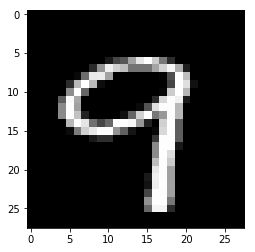

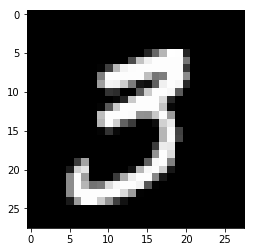

In [193]:
plot_image(train_data[0][0])
plot_image(train_data[0][1])


In [208]:
#Let's investigate the data

test = np.array(train_data[0][0])
print(np.shape(test[0]))
#uncomment that line of code to see the pixel values
# print(test[0]) 

#It looks like the data is not between 0 and 255, but between 0 and 1
classes = ('0','1','2','3','4','5','6','7','8','9')


(28, 28)


In [226]:
class MaxPoll(nn.Module):
    
    def __init__(self,kernal_size):
        
        super().__init__()
        self.kernal_size = kernal_size
        self.conv1 = nn.Conv2d(1,10,kernel_size=self.kernal_size)
    
    def forward(self,x):
        
        x = F.max_pool2d(self.conv1(x),2)
        
        return(x)

    
def get_new_image(batch,kernal_size):
    
    model = MaxPoll(kernal_size)
    img = model.forward(test_tensor)
    img = img.data.numpy()
    return(img[0][0])
    

In [227]:
first_batch = torch.from_numpy(test).float().cpu()
first_batch = test_tensor.unsqueeze(0)
# model = MaxPoll()
# test_img = model.forward(test_tensor)
# test_img = test_img.data.numpy()

In [228]:
#Let's see what different kernal sizes do 
img1 = get_new_image(first_batch,1)
img2 = get_new_image(first_batch,2)
img3 = get_new_image(first_batch,3)

Original image


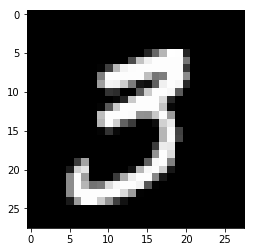

kernal size 1 with Max Polling


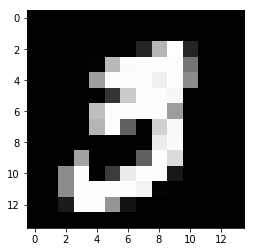

kernal size 2 with Max Polling


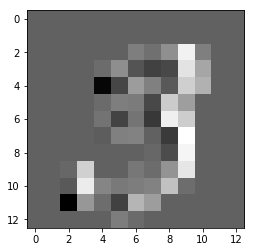

kernal size 3 with Max Polling


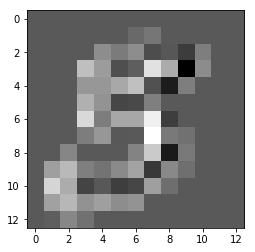

In [229]:
print("Original image")
plot_image(first_batch[0][0])

print("kernal size 1 with Max Polling")
plt.imshow(img1,cmap="gray")
plt.show()

print("kernal size 2 with Max Polling")
plt.imshow(img2,cmap="gray")
plt.show()

print("kernal size 3 with Max Polling")
plt.imshow(img3,cmap="gray")
plt.show()




In [230]:
class AvgPoll(nn.Module):
    
    def __init__(self,kernal_size):
        
        super().__init__()
        self.kernal_size = kernal_size
        self.conv1 = nn.Conv2d(1,10,kernel_size=self.kernal_size)
    
    def forward(self,x):
        
        x = F.avg_pool2d(self.conv1(x),2)
        
        return(x)

    
def get_new_image(batch,kernal_size):
    
    model = AvgPoll(kernal_size)
    img = model.forward(test_tensor)
    img = img.data.numpy()
    return(img[0][0])
    

In [231]:
img1 = get_new_image(first_batch,1)
img2 = get_new_image(first_batch,2)
img3 = get_new_image(first_batch,3)

Original image


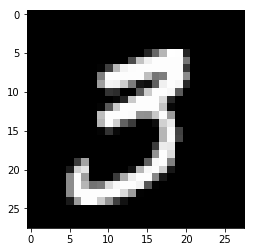

kernal size 1 with Average Polling


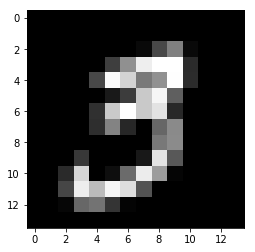

kernal size 2 with Average Polling


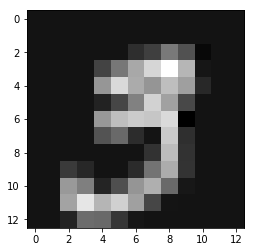

kernal size 3 with Average Polling


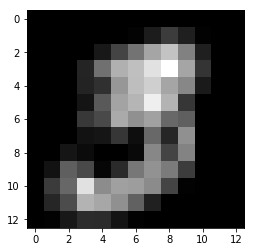

In [232]:
print("Original image")
plot_image(first_batch[0][0])

print("kernal size 1 with Average Polling")
plt.imshow(img1,cmap="gray")
plt.show()

print("kernal size 2 with Average Polling")
plt.imshow(img2,cmap="gray")
plt.show()

print("kernal size 3 with Average Polling")
plt.imshow(img3,cmap="gray")
plt.show()
